In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Import and split data

In [22]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [23]:
train, test = train_test_split(public_df, shuffle=True)

In [24]:
pd.set_option('display.max_columns', 999)

In [8]:
len(train)/len(public_df)

0.749932669000808

In [25]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missings', 'Percent Missings'])
missing_data

,Total Missings,Percent Missings
spendingDayOther,5487,0.985276
otherEmotion,5456,0.979709
workPositiveInfluence,5106,0.916861
spendingDay,5010,0.899623
connectedPatients,5010,0.899623
connectedColleagues,5010,0.899623
sleptFor,5010,0.899623
emotionResponse,4227,0.759023
emotionResponseHelpful,2560,0.459688
workPilingUp,872,0.156581


In [11]:
# def fix_spelling(df, col):
#     df[col] = df[col].replace('embarrased', 'embarrassed')
#     return df

train['specificEmotion'] = train['specificEmotion'].replace('embarrased', 'embarrassed')
test['specificEmotion'] = test['specificEmotion'].replace('embarrased', 'embarrassed')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
test_subset = test[['feelingEmotion', 'generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 
       'emotionDuration', 'selfCareEatingWell',
       'selfCareCooking', 'selfCareExercise', 'selfCareSeekingSupport',
       'selfCareTimeOutside', 'selfCareSpiritualPractice',
       'selfCareQualityTimeTogether', 'selfCareQualityTimeAlone',
       'selfCarePet', 'selfCareOther', 'selfCareNone', 'selfCareOtherActivity']]

In [13]:
# fix_spelling(test_subset, 'specificEmotion')

In [176]:
test_subset['specificEmotion'] = test_subset['specificEmotion'].replace('embarrased', 'embarrassed')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
train_subset = train[['feelingEmotion', 'generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 
       'emotionDuration', 'selfCareEatingWell',
       'selfCareCooking', 'selfCareExercise', 'selfCareSeekingSupport',
       'selfCareTimeOutside', 'selfCareSpiritualPractice',
       'selfCareQualityTimeTogether', 'selfCareQualityTimeAlone',
       'selfCarePet', 'selfCareOther', 'selfCareNone', 'selfCareOtherActivity']]

In [28]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5569 entries, 3423 to 2828
Data columns (total 36 columns):
feelingEmotion                 5569 non-null object
generalEmotion                 5569 non-null object
specificEmotion                5569 non-null object
intensity                      5569 non-null float64
generalTrigger                 5539 non-null object
specificTrigger                5539 non-null object
bodySensationIntensity         5569 non-null float64
bodySensationForehead          5569 non-null int64
bodySensationEyes              5569 non-null int64
bodySensationJaw               5569 non-null int64
bodySensationNeck              5569 non-null int64
bodySensationShoulders         5569 non-null int64
bodySensationChest             5569 non-null int64
bodySensationArms              5569 non-null int64
bodySensationHands             5569 non-null int64
bodySensationStomach           5569 non-null int64
bodySensationBowel             5569 non-null int64
bodySensationL

## Why is the code below not working to fill NaN's?

In [18]:
train_subset[train_subset.isnull().any(axis=1)].index

Int64Index([1892, 1864, 1885, 1873, 1861, 1859, 1872, 1877, 1863, 1868, 1888,
            1879, 1878, 1871, 1862, 1860, 1870, 1876, 1866, 1883, 1875, 1889],
           dtype='int64')

In [19]:
train_subset['generalTrigger'].loc[train_subset[train_subset.isnull().any(axis=1)].index] = train_subset['generalTrigger'].mode()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
train_subset[['generalTrigger', 'specificTrigger']].mode()

,generalTrigger,specificTrigger
0,wellbeing,play


In [55]:
train_subset = train_subset['generalTrigger'].fillna(train_subset['generalTrigger'].mode())

In [20]:
train_subset[train_subset.isnull().any(axis=1)]

,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity
1892,yes,anger,angry,0.75,NaN,NaN,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1864,yes,enjoyment,peaceful,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0
1885,yes,anger,angry,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1873,no,sadness,discouraged,0.25,NaN,NaN,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0
1861,yes,anger,irritated,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
1859,yes,anger,angry,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
1872,no,fear,afraid,0.25,NaN,NaN,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1877,yes,other,ashamed,0.25,NaN,NaN,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1863,yes,enjoyment,peaceful,0.50,NaN,NaN,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60+,0,0,0,0,0,0,0,0,0,0,0,0
1868,yes,sadness,sad,0.50,NaN,NaN,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
train_subset['emotionDuration'] = train_subset['emotionDuration'].replace('60+', 90)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
test_subset['emotionDuration'] = test_subset['emotionDuration'].replace('60+', 90)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_subset = train_subset.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

In [30]:
test_subset = test_subset.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

## Drop NaN's instead

In [34]:
train_subset = train_subset.dropna()

In [35]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5539 entries, 3423 to 2828
Data columns (total 36 columns):
feelingEmotion                 5539 non-null int64
generalEmotion                 5539 non-null object
specificEmotion                5539 non-null object
intensity                      5539 non-null float64
generalTrigger                 5539 non-null object
specificTrigger                5539 non-null object
bodySensationIntensity         5539 non-null float64
bodySensationForehead          5539 non-null int64
bodySensationEyes              5539 non-null int64
bodySensationJaw               5539 non-null int64
bodySensationNeck              5539 non-null int64
bodySensationShoulders         5539 non-null int64
bodySensationChest             5539 non-null int64
bodySensationArms              5539 non-null int64
bodySensationHands             5539 non-null int64
bodySensationStomach           5539 non-null int64
bodySensationBowel             5539 non-null int64
bodySensationLe

In [36]:
test_subset = test_subset.dropna()

## Dummify categoricals

In [37]:
train_subset.head()

,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity
3423,1,enjoyment,peaceful,0.75,wellbeing,exercise,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0
7101,0,anger,irritated,0.25,socialSupport,timeFamily,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
6039,0,fear,nervous,0.75,personalConcerns,sleepDeprived,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0
2507,0,anger,annoyed,0.50,socialStress,familyChallenge,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
3068,1,enjoyment,happy,0.25,workSatisfaction,productivity,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0


In [233]:
scaler = StandardScaler()
# train_subset['emotionDuration'].reshape(-1,1)
scaler.fit(train_subset)
new_train = scaler.transform(train_subset)

In [239]:
from sklearn.preprocessing import MinMaxScaler

In [244]:
scaler2 = MinMaxScaler(feature_range = (0,1))
scaler2.fit(train_subset)
newer_train = scaler2.transform(train_subset)
newer_train

array([[1.  , 0.25, 0.25, ..., 0.  , 0.  , 0.  ],
       [1.  , 0.75, 0.5 , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.75, 0.75, ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 0.5 , 0.5 , ..., 0.  , 0.  , 1.  ],
       [1.  , 0.75, 0.75, ..., 0.  , 0.  , 0.  ],
       [1.  , 0.75, 0.75, ..., 0.  , 0.  , 0.  ]])

In [243]:
train_subset.head()

,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,globalPolitics,healthProblems,healthcare,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
558,1,0.25,0.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3718,1,0.75,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1797,1,0.75,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1531,1,0.50,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6855,0,0.25,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
generalEmotion_cols = pd.get_dummies(train_subset.generalEmotion)

In [130]:
specificEmotion_cols = pd.get_dummies(train_subset.specificEmotion)

In [131]:
generalTrigger_cols = pd.get_dummies(train_subset.generalTrigger)

In [132]:
specificTrigger_cols = pd.get_dummies(train_subset.specificTrigger)

In [133]:
train_subset[generalEmotion_cols.columns] = generalEmotion_cols 

In [134]:
train_subset[specificEmotion_cols.columns] = specificEmotion_cols

In [135]:
train_subset[generalTrigger_cols.columns] = generalTrigger_cols

In [136]:
train_subset[specificTrigger_cols.columns] = specificTrigger_cols

In [140]:
train_subset = train_subset.drop(['generalEmotion', 'specificEmotion', 'generalTrigger', 'specificTrigger'], axis=1)

In [183]:
train_subset = train_subset.drop(['climateChange'], axis=1)

In [184]:
generalEmotion_cols = pd.get_dummies(test_subset.generalEmotion)

In [185]:
specificEmotion_cols = pd.get_dummies(test_subset.specificEmotion)

In [186]:
generalTrigger_cols = pd.get_dummies(test_subset.generalTrigger)

In [187]:
specificTrigger_cols = pd.get_dummies(test_subset.specificTrigger)

In [188]:
test_subset[generalEmotion_cols.columns] = generalEmotion_cols

In [189]:
test_subset[specificEmotion_cols.columns] = specificEmotion_cols

In [190]:
test_subset[generalTrigger_cols.columns] = generalTrigger_cols

In [191]:
test_subset[specificTrigger_cols.columns] = specificTrigger_cols

In [192]:
test_subset = test_subset.drop(['generalEmotion', 'specificEmotion', 'generalTrigger', 'specificTrigger'], axis=1)

In [195]:
for x in train_subset.columns:
    if x not in test_subset.columns:
        print(x)

embarrased


In [197]:
train_subset = train_subset.drop(['embarrased'], axis=1)

## Train initial kMeans model

In [198]:
kmeans = KMeans(n_clusters=8).fit(train_subset)

In [200]:
predictions = kmeans.predict(test_subset)

In [201]:
predictions

array([5, 2, 0, ..., 5, 0, 3], dtype=int32)

In [206]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([174, 269, 253, 363,  79, 320, 194, 195]))

In [214]:
kmeans2 = KMeans(n_clusters=3).fit(train_subset)

In [218]:
predictions2 = kmeans2.predict(test_subset)

In [219]:
predictions2

array([0, 2, 0, ..., 0, 0, 0], dtype=int32)

In [220]:
np.unique(predictions2, return_counts=True)

(array([0, 1, 2], dtype=int32), array([1130,  464,  253]))

## Silhouette Scores

In [222]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [210]:
silhouette_score(test_subset, predictions, metric='jaccard')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


-0.06027229434405736

In [221]:
silhouette_score(test_subset, predictions2, metric='jaccard')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


-0.014552947402401581

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


For n_clusters = 3 The average silhouette_score is : 0.16201226584010478


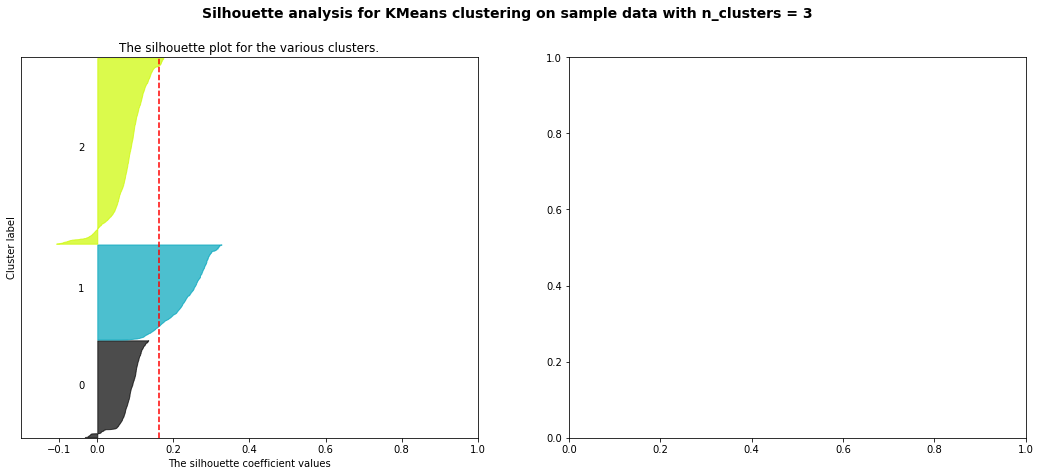

For n_clusters = 4 The average silhouette_score is : 0.1726555986623687


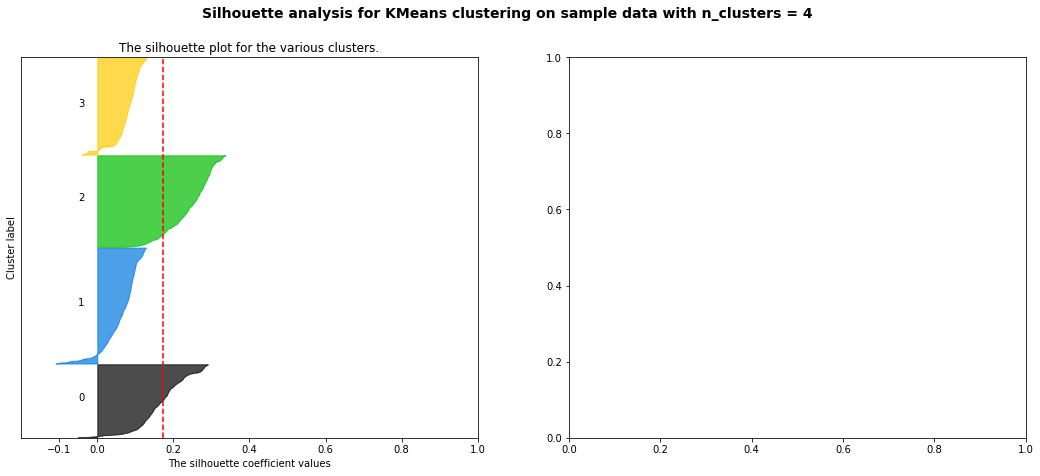

For n_clusters = 5 The average silhouette_score is : 0.19327329467732618


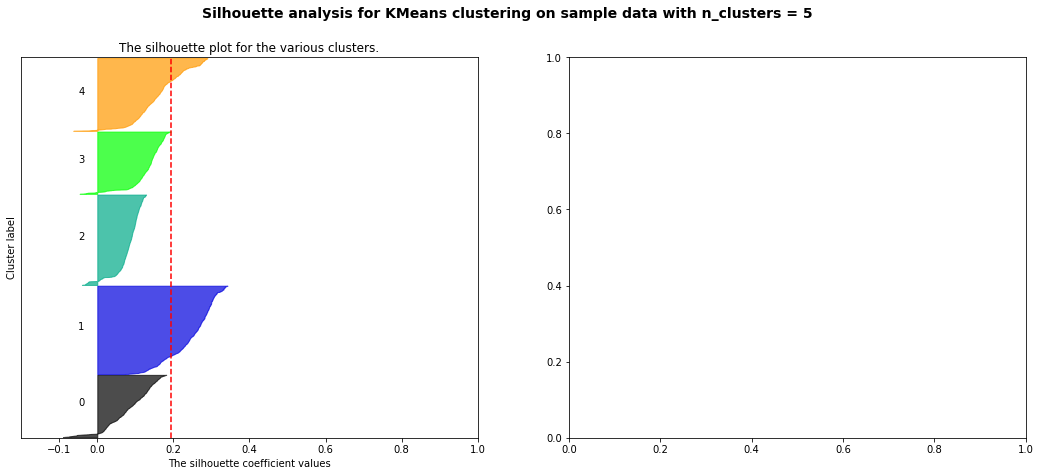

For n_clusters = 6 The average silhouette_score is : 0.220656107559578


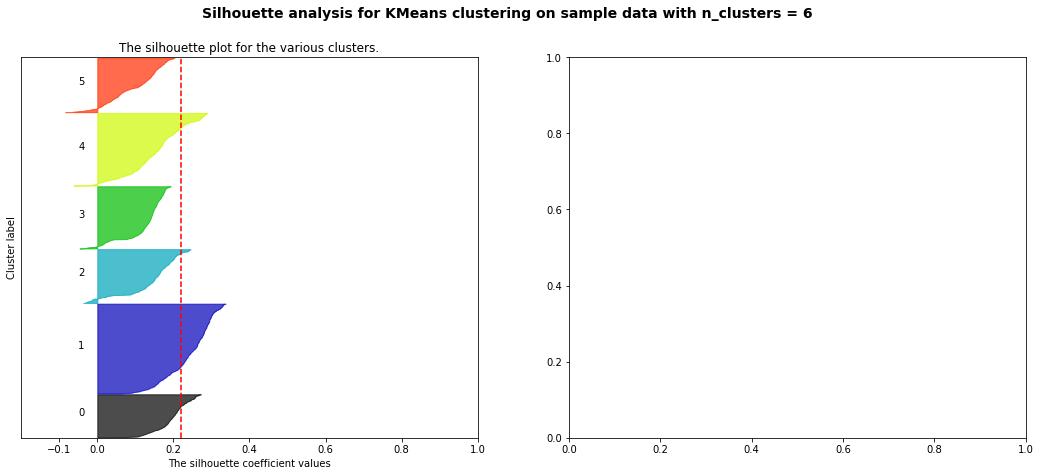

For n_clusters = 7 The average silhouette_score is : 0.1985748394859229


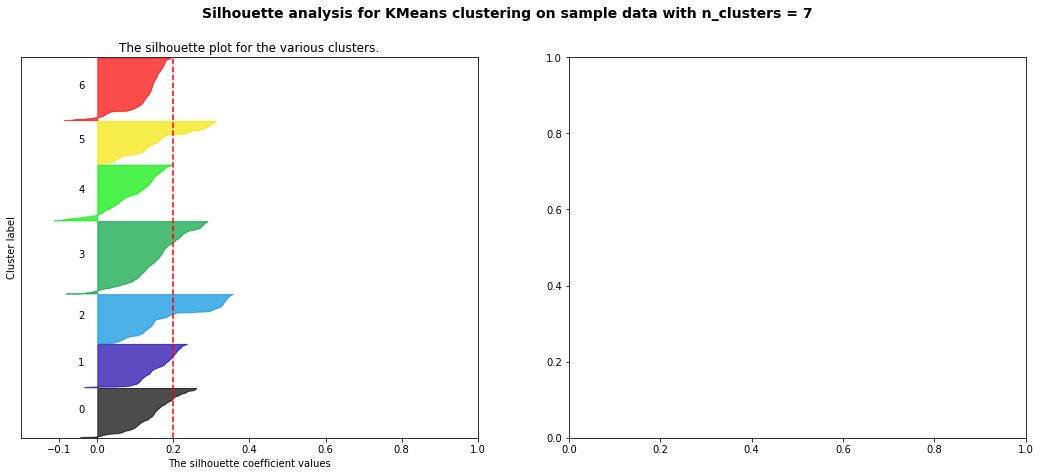

For n_clusters = 8 The average silhouette_score is : 0.20851578492171435


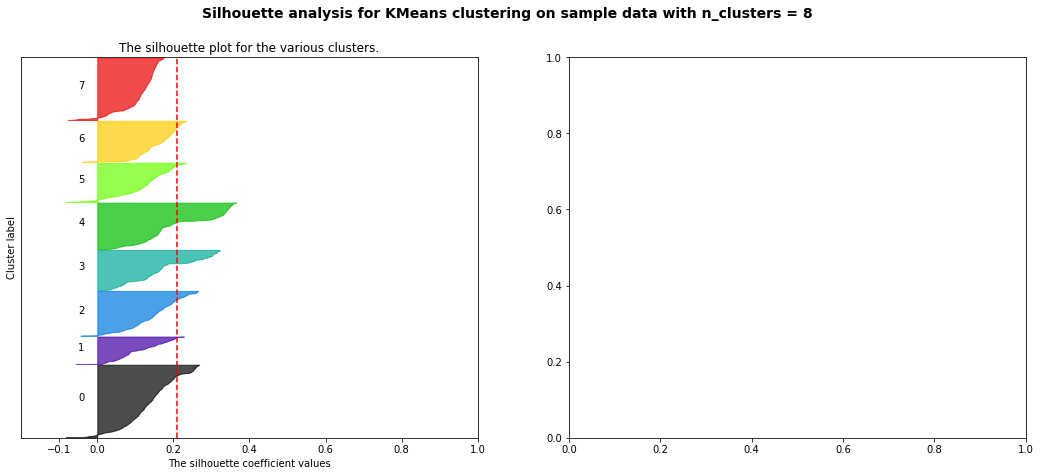

In [245]:
X = newer_train
range_n_clusters = range(3,9)

# taken from sklearn
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='jaccard')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors)

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1],
#                 marker='o', c="white", alpha=1, s=200)

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()